### Résulats

#### Partie 5 - Analyse des résultats et vérification du model


In [1]:
%matplotlib inline

import random
import numpy as np
import os
import sys
from IPython.display import display
import tensorflow as tf
import datetime
from keras import callbacks
from keras.models import load_model
tf.debugging.set_log_device_placement(False)
tf.get_logger().setLevel('WARNING')
tf.autograph.set_verbosity(1)

sys.path.append('..')
import Modules.utils as utils
import Modules.init as init
import Modules.display as disp
import Modules.generator as gen
import Modules.model as model

os.environ['TF_CPP_MIN_LOG_LEVEL'] = '2'

datasets_dir = init.init('U-NET analysis')

<br>**Projet M1 - Détection d'anomalies sur imagerie médicale - U-NET analysis**

Version              : 2
Notebook id          : U-NET analysis
Run time             : Tuesday 14 February 2023, 18:35:37
Hostname             : DESKTOP-FRB70CL (Windows)
Tensorflow log level : Error only  (=2)
Datasets dir         : C:/Users/Marc/Desktop/
Run dir              : ./run
Update keras cache   : False
tensorflow           : 2.10.1
tensorflow.keras     : 2.10.0
numpy                : 1.21.5
skimage              : 0.19.2
matplotlib           : 3.5.2
pandas               : 1.4.4


In [12]:
seed=24
batch_size= 20

    val_img_path = os.path.join(datasets_dir, 'DATASET', 'Train', 'Images')
val_mask_path = os.path.join(datasets_dir, 'DATASET', 'Train', 'Masks')
val_img_gen = gen.Generator(val_img_path, val_mask_path, batch_size, seed)

model = load_model("ENDOMETRIOSIS_UNET_SEG_BC_FINAL.hdf5", compile=False)

test_image_batch, test_mask_batch = val_img_gen.__next__()

IndentationError: unexpected indent (1734371555.py, line 4)

In [13]:
y_pred=model.predict(test_image_batch)
y_pred_argmax=np.argmax(y_pred, axis=3)
y_argmax = np.argmax(test_mask_batch, axis=3)

1/1 [==============================] - 0s 60ms/step


In [14]:
from keras.metrics import MeanIoU
n_classes = 2
IOU_keras = MeanIoU(num_classes=n_classes)  
IOU_keras.update_state(y_argmax, y_pred_argmax)
print("Mean IoU =", IOU_keras.result().numpy())

Mean IoU = 1.0


(384, 640, 3)
(384, 640, 1)
(1, 384, 640, 3)
1/1 [==============================] - 0s 38ms/step
(1, 384, 640, 1)
(384, 640, 1)


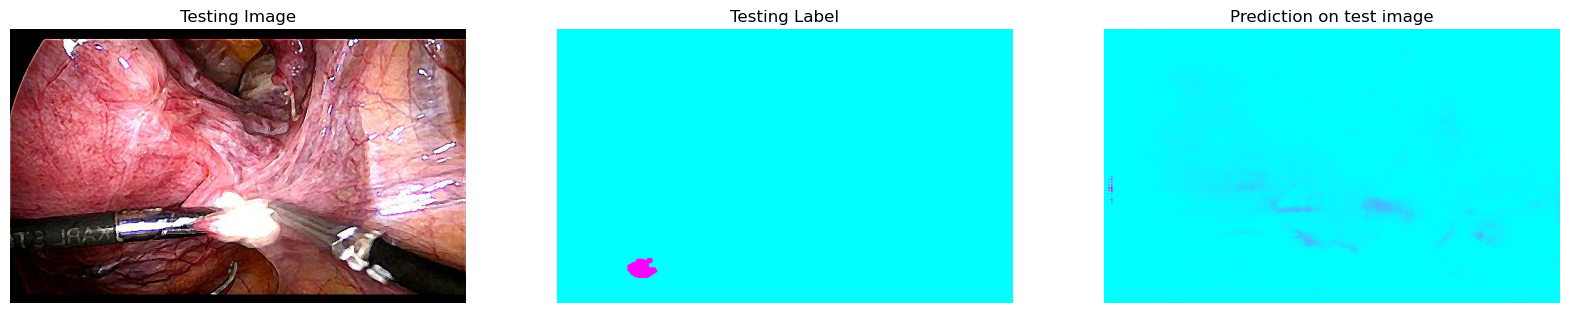

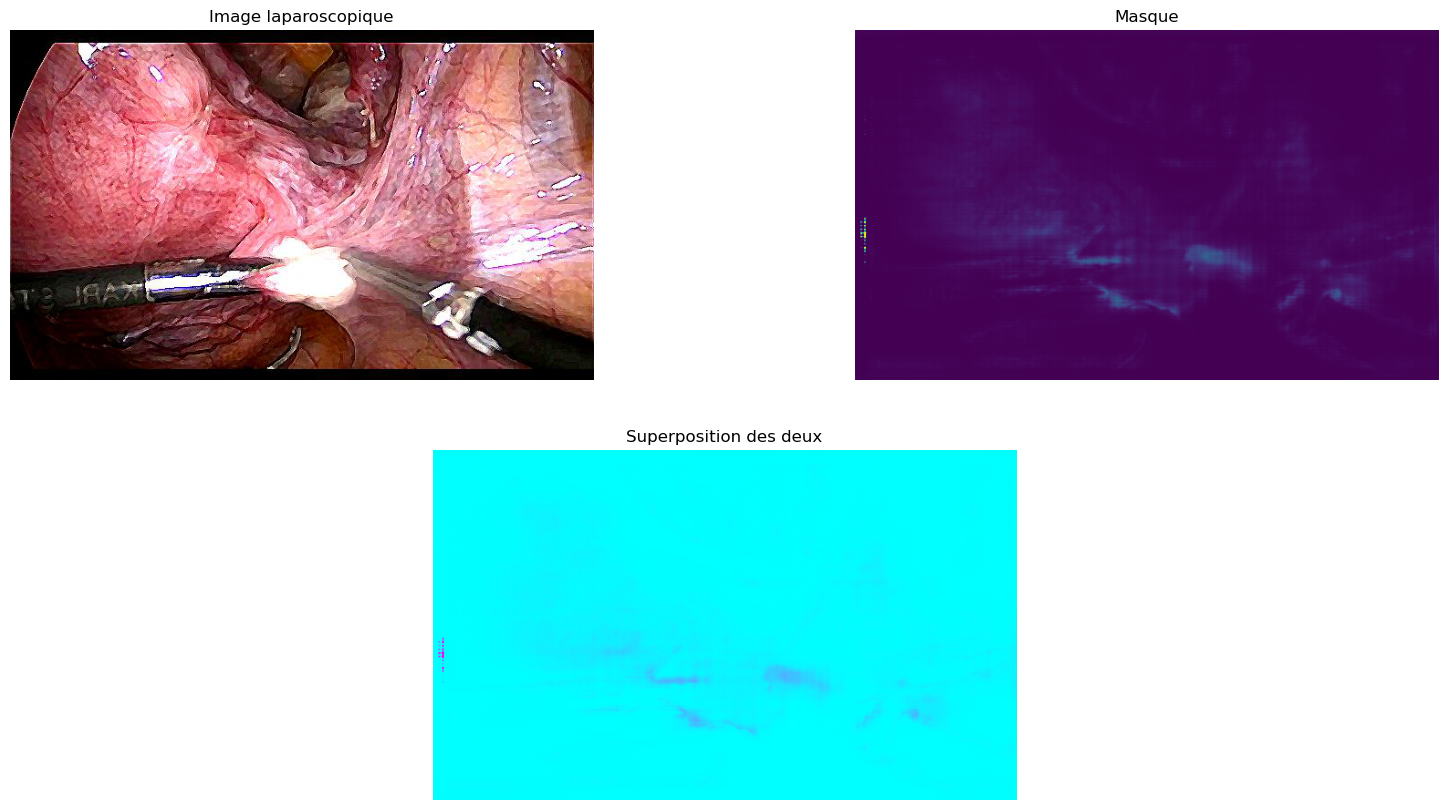

In [35]:
import matplotlib.pyplot as plt
test_image_batch, test_mask_batch = val_img_gen.__next__()
test_img_number = random.randint(0, len(test_image_batch)-1)
test_img = test_image_batch[test_img_number]
print(test_img.shape)
ground_truth=test_mask_batch[test_img_number]
print(ground_truth.shape)

test_img_input=np.expand_dims(test_img, 0)
print(test_img_input.shape)
prediction = (model.predict(test_img_input))
print(prediction.shape)
predicted_img=np.reshape(prediction, (384, 640, 1))
print(predicted_img.shape)

plt.figure(figsize=(20, 15))
plt.subplot(231)
plt.title('Testing Image')
plt.imshow(test_img)
plt.axis('off')
plt.subplot(232)
plt.title('Testing Label')
plt.imshow(ground_truth, cmap='cool')
plt.axis('off')
plt.subplot(233)
plt.title('Prediction on test image')
plt.imshow(predicted_img, cmap='cool')
plt.axis('off')
plt.show()

disp.plot3(test_img, predicted_img)

In [22]:
os.path.join(os.curdir, 'tes')

'.\\tes'

In [23]:
import os
os.curdir

'.'